In [2]:
import numpy as np
import damask
import matplotlib.pyplot as plt

### Importing the data

In [3]:
from pathlib import Path
path = Path()
file = path.joinpath('newAL_cyclic_tension_lowres.hdf5')
result = damask.Result(file)

### Adding the necessary caculation to the result

In [4]:
try:
    # Try to add the stress Cauchy if it's not in the result
    if 'sigma' not in result.get():
        result.add_stress_Cauchy()

    # Try to add the strain 'F' and 'F_p' if they're not in the result
    if 'F' not in result.get():
        result.add_strain('F', 'U')
    if 'F_p' not in result.get():
        result.add_strain('F_p', 'U')

    # Try to add the equivalent Mises 'sigma' and 'F' if they're not in the result
    if 'sigma_vM' not in result.get():
        result.add_equivalent_Mises('sigma')
    if 'F_vM' not in result.get():
        result.add_equivalent_Mises('F')

    # Try to add the strain and strain 'F_p' if they're not in the result
    if 'epsilon_V^0.0(F)' not in result.get():
        result.add_strain()
        result.add_strain('F_p')

    # Try to add the equivalent Mises 'epsilon_V^0.0(F)' and 'epsilon_U^0.0(F_p)' if they're not in the result
    if 'epsilon_V^0.0(F)_vM' not in result.get():
        result.add_equivalent_Mises('epsilon_V^0.0(F)')
    if 'epsilon_U^0.0(F_p)_vM' not in result.get():
        result.add_equivalent_Mises('epsilon_U^0.0(F_p)')

    # Try to add the IPF color if it's not in the result
    if 'IPFcolor_(1 0 0)' not in result.get():
        result.add_IPF_color(np.array([1,0,0]))
except:
    pass

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   0% ETA n/a

### Plotting the data

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


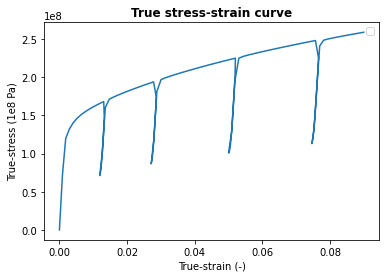

In [5]:
true_stress = [np.average(s) for s in result.get(['sigma_vM']).values()]
true_strain = [np.average(s) for s in result.get(['epsilon_V^0.0(F)_vM']).values()]

plt.plot(true_strain, true_stress)
plt.xlabel('True-strain (-)')
plt.ylabel('True-stress (1e8 Pa)')
plt.title('True stress-strain curve', weight='bold')
plt.legend()
plt.show()

### Exporting the data into a VTK file for futher visuoalization using Paraview

In [ ]:
result.export_VTK(parallel=False)